#### 06-3 주성분 분석
#### - keyword: 차원축소, 주성분 분석, 설명된 분산
#### - 차원과 차원 축소 
####  -> 10,000개의 픽셀 -> 10,000개의 특성: 머신러닝에서는 이런 특성을 차원(dimension)이라고도 부름
#### - 차원축소(diemnsionality reduction): 비지도학습, 데이터를 가장 잘 나타내는 일부 특성을 선택하겨 데이터의 크기를 줄이고 지도 학습 모델의 성능을 향상 시키는 방법
#### - 주성분 분석 (Principal Component Analysis) : 분산이 큰 방향을 찾는 것
####    -> 주성분 벡터: 원본 데이터에 있는 어떠한 방향, 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음


In [1]:
# PCA 클래스 

import numpy as np
fruits = np.load ('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
# 사이킷런은 decomposition 모듈아래 PCA 알고리즘 제공
# n_components 매개변수에 주성분 개수 지정

from sklearn.decomposition import PCA
pca = PCA (n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
print(pca.components_.shape)

# 50개의 주성분에 원본 데이터의 특성 개수와 같은 10,000

(50, 10000)


In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)                   #n은 샘플의 개수

    # 한줄에 10개의 이미지를 그림, 샘플 개수를 10으로 나눠 전체 행 개수 계산
    rows = int(np.ceil(n/10))

    # 행이 1개이면 열의 개수는 샘플 개수, 그렇지 않으면 10개 
    cols= n if rows < 2 else 10
    fig, axs = plt.subplots (rows, cols,
                            figsize = (cols*ratio, rows*ratio), squeeze = False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:   # n개 까지만 그림
                axs[i,j].imshow(arr[i*10 + j], cmap ='gray_r')
            axs[i,j].axis('off')
    plt.show()

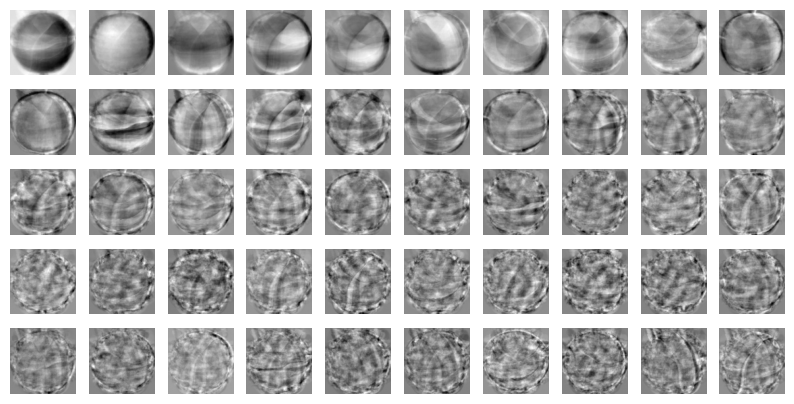

In [ ]:
# 주성분 그림으로 그리기 

draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
#원본데이터 크기 확인

print(fruits_2d.shape)

(300, 10000)


In [ ]:
# 원본데이터 차원을 50으로 축소

fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [ ]:
# inverse_transform() method를 활용해 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


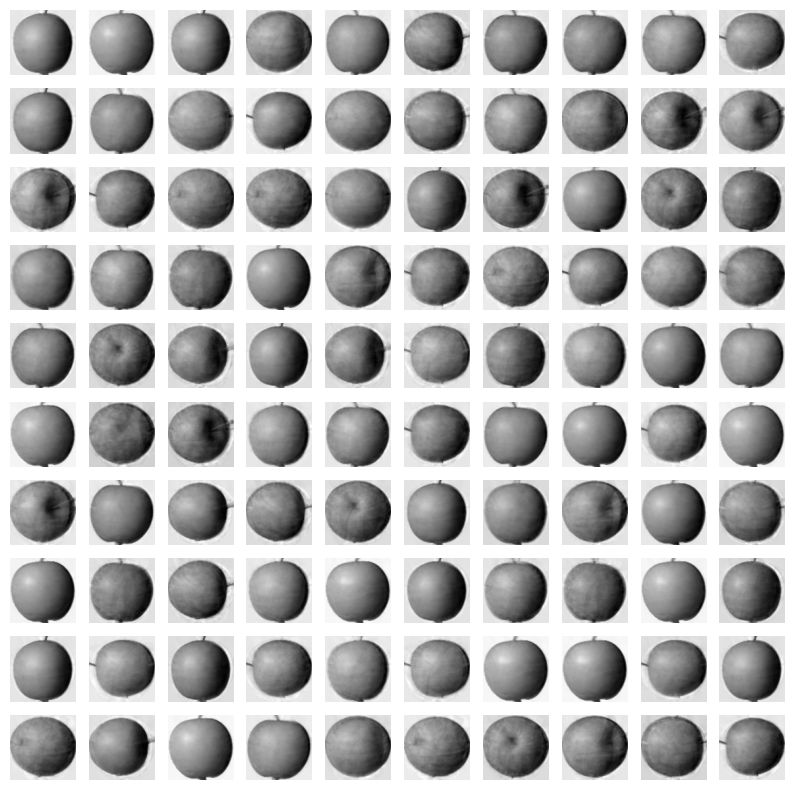

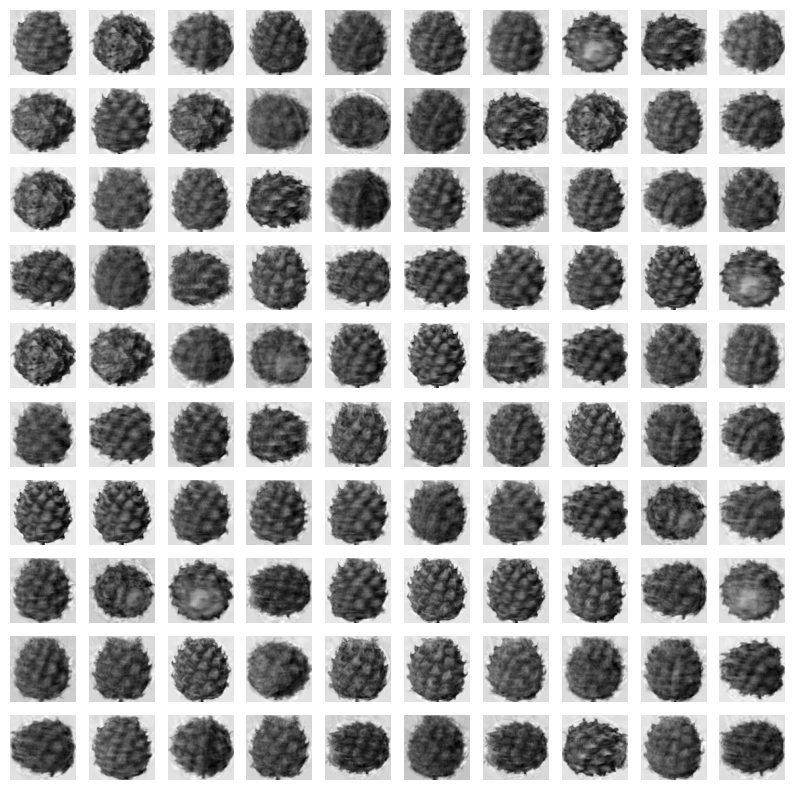

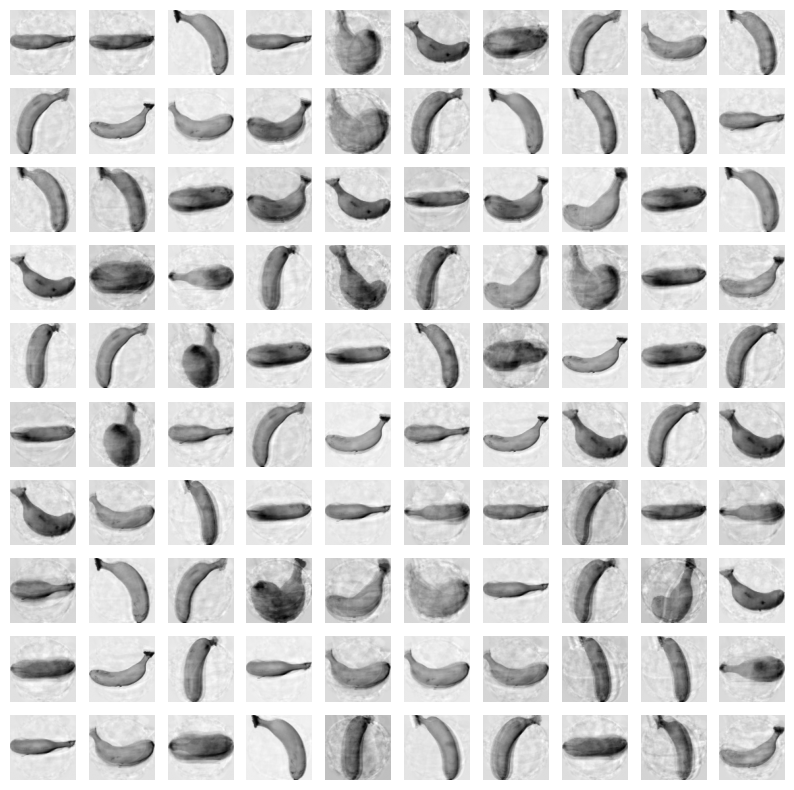

In [ ]:
# 원본데이터 복원 확인

fruits_reconstruct = fruits_inverse.reshape(-1, 100,100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

#### 설명된 분산 
#### - 설명된 분산(explained variance): 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
#### explained_variance_ratio_: 각 주성분의 설명된 분산 비율 기록 

In [ ]:

print(np.sum(pca.explained_variance_ratio_))

#92%가 넘는 분산 유지

0.9215168540890817


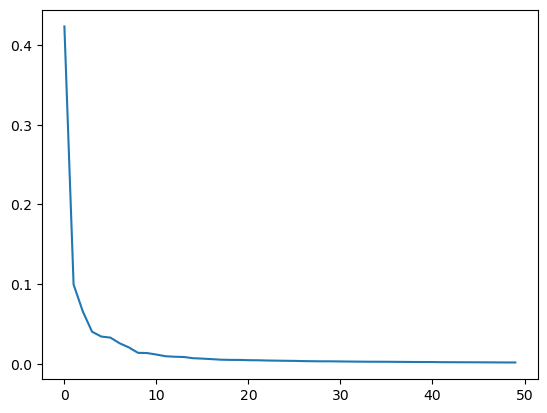

In [12]:
# 설명된 분산 비율을 그래프로 그리기 -> 적절한 주성분의 개수 찾는데 도움이 됨

import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 처음 10개의 주성분이 대부분의 분산 표현

#### 다른 알고리즘과 함께 사용하기
#### - PCA로 차원 축소된 데이터를 사용하여 지도학습모델 훈련

In [ ]:
# 로지스틱 회귀모델

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [15]:
# 사과 0, 파인애플1, 바나나 2로 타깃값 지정 

target = np.array([0]*100+[1]*100+[2]*100)

In [ ]:
# 원본데이터로 로지스틱 회귀모델에서 성능 평가
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 정확도: 99.6%, 과대적합일 가능성 큼
# 훈련시간은 0.134초

0.9966666666666667
0.13436813354492189


In [ ]:
# PCA축소데이터로 로지스틱 회귀모델에서 성능 평가

scores =cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 정확도: 99.6%로 원본데이터와 동일
# 훈련시간은 0.011초로 감소 
# 저장공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있ㅇ,ㅁ

0.9966666666666667
0.011484336853027344


In [ ]:
# n_components에 주성분의 개수 지정 대신 설명된 분산의 비율 입력 -> 지정된 비율에 도달할때까지 자동으로 주성분을 찾음

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)


,n_components,0.5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
print(pca.n_components_)

# 2개의 특성으로 원본 데이터에 있는 분산의 50%를 표현 할수 있음 

2


In [ ]:
# 이 모델로 원본 데이터 변환, 주성분이 2개이므로 데이터의 크기는 (300,2)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
# 2개의 특성으로 교차검증 결과 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.026238250732421874


/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable

In [ ]:
# 차원 축소된 데이터를 사용해 k-means알고리즘으로 클러스터 찾기

from sklearn.cluster import KMeans
km= KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


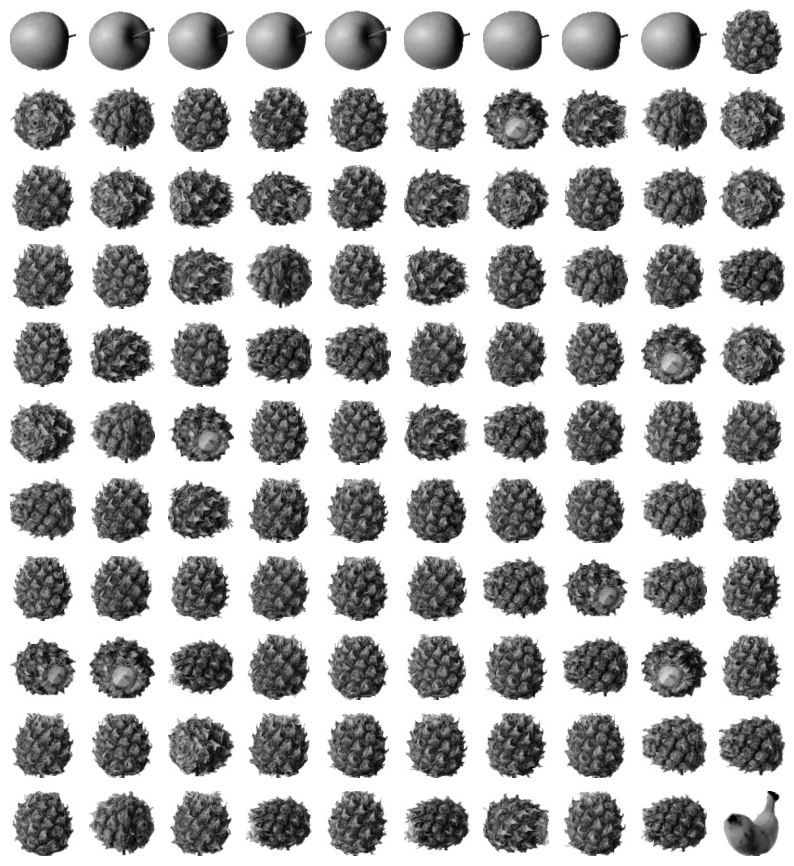

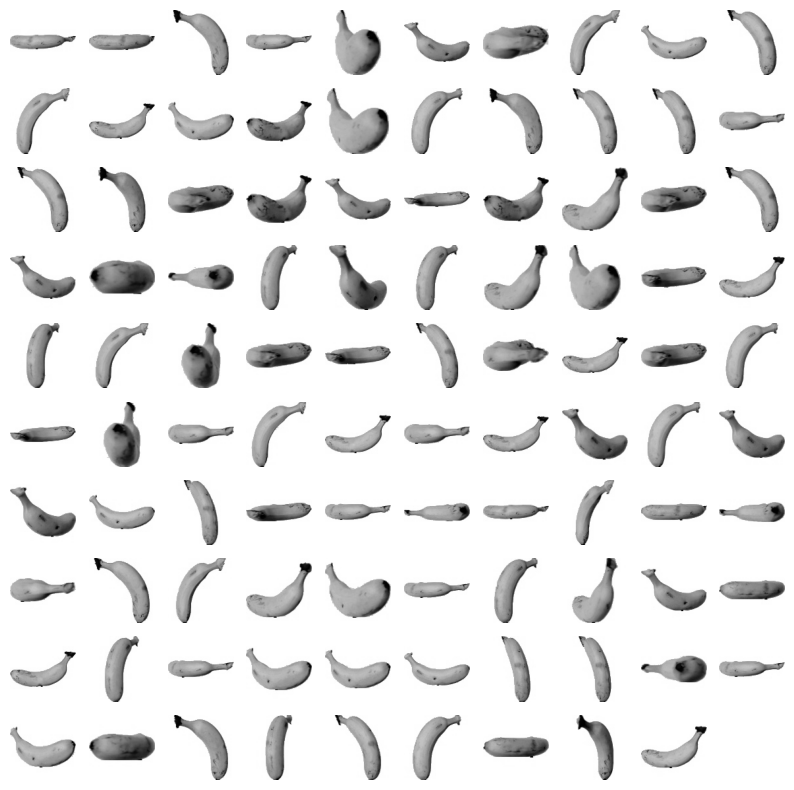

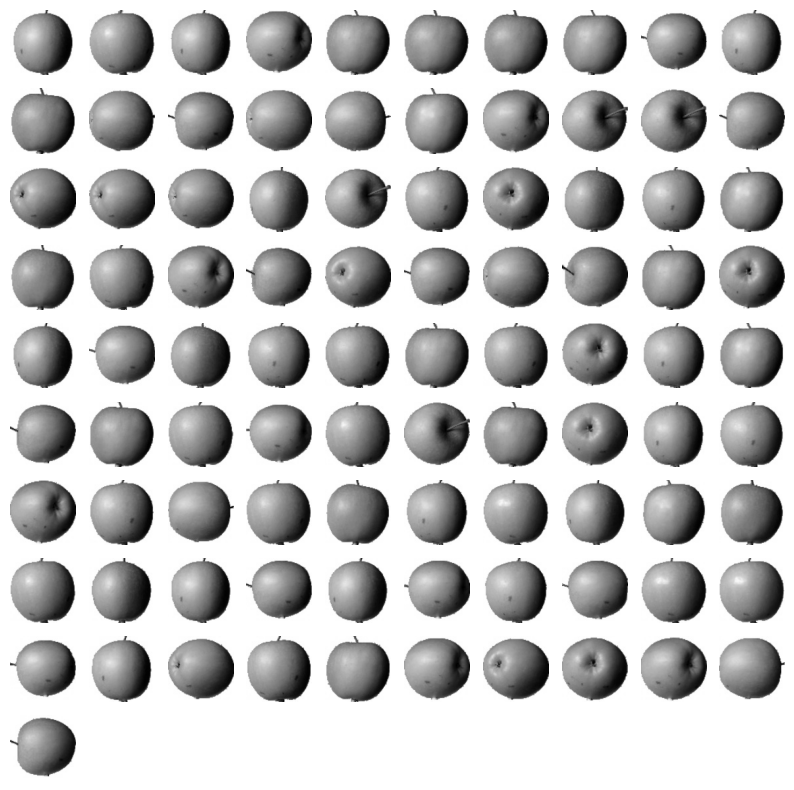

In [ ]:
# 과일이미지 출력

for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")


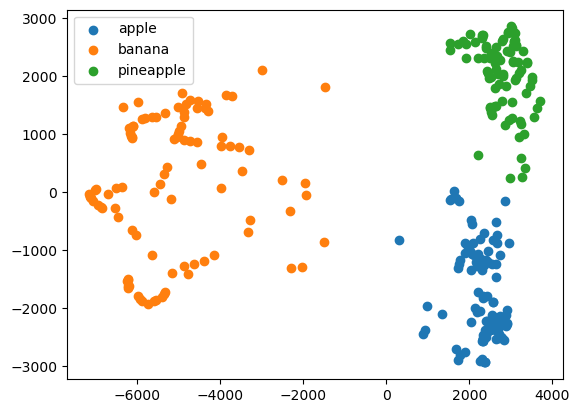

In [ ]:
# Scatter plot그리기

for label in range (0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()